In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
dframe = load_boston() #loading the dataset in a variable

In [2]:
dframe.keys() #the keys of data set

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(dframe.DESCR) #info about the data set

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(dframe.data,columns=dframe.feature_names)
boston['TARGET'] = dframe.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.isnull().sum() #checking if the dataset contains any null value. Here False represnts Not Null and True represents Null value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = boston.drop('TARGET',axis = 1)
y = boston['TARGET']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.20,random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [17]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
ml_model = LinearRegression()
ml_model.fit(X_train,Y_train)
Y_train_predict = ml_model.predict(X_train)
root_mse = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
print(f"The model's RMSE for training data is:{root_mse}",end = "\n")
Y_test_predict = ml_model.predict(X_test)
root_mse_test = np.sqrt(mean_squared_error(Y_test,Y_test_predict))
print(f"The model's RMSE for testing data is:{root_mse_test}",end = "\n")

The model's RMSE for training data is:4.741000992236517
The model's RMSE for testing data is:4.5682920423032
1.0


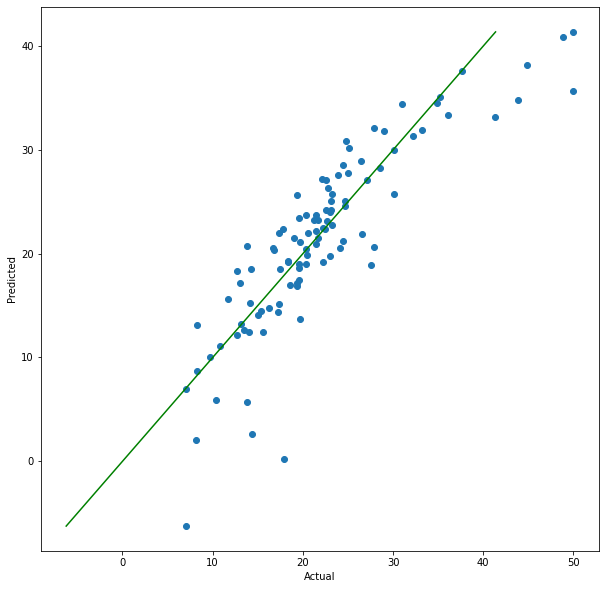

In [22]:
#VISUALIZATION PURPOSES-----
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_test_predict)
plt.plot([min(Y_test_predict),max(Y_test_predict)],[min(Y_test_predict),max(Y_test_predict)],color = "green")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()